In [1]:
import asb
import pyprobound
import pyprobound.utils
import pyprobound.plotting
import torch

# Data specification

In [2]:
alphabet = pyprobound.alphabets.DNA()
dataframe = asb.get_asb_dataframe("CTCF.tsv")
asb_table = asb.ASBTable(
    dataframe, alphabet, left_flank_length=17, right_flank_length=17
)

# Model specification

In [3]:
# PSAMs
nonspecific = pyprobound.layers.NonSpecific(alphabet=alphabet, name="NS")
psam = pyprobound.layers.PSAM(
    kernel_size=18,
    alphabet=alphabet,
    seed=["---CGCCMYCTAGTGG--"],
    name="CTCF",
)

In [4]:
aggregate = asb.ASBAggregate(
    (
        pyprobound.Contribution(bmd)
        for bmd in [
            pyprobound.Mode(
                [
                    pyprobound.layers.Conv0d.from_nonspecific(
                        nonspecific, asb_table
                    )
                ]
            ),
            pyprobound.Mode(
                [pyprobound.layers.Conv1d.from_psam(psam, asb_table)]
            ),
        ]
    ),
)
model = asb.ASBLoss([aggregate])

# Fitting

In [5]:
optimizer = pyprobound.Optimizer(
    model,
    [asb_table],
    greedy_threshold=0,
    device="cpu",
    checkpoint="CTCF_ASB.pt",
)

/Users/lucas/Optimer/Gits/PyProBound/src/pyprobound/optimizer.py:142: UserWarning: Checkpoint file CTCF_ASB.pt is not empty
  warnings.warn(f"Checkpoint file {checkpoint} is not empty")


In [6]:
print(optimizer.get_train_sequential())

### Binding: NSNonSpecific
	Step 0
		ASBLoss.freeze()
		ASBAggregate.activity_heuristic(contribution=Contribution)
	Step 1
		ASBLoss.unfreeze(parameter=all)

### Binding: CTCFPSAM
	Step 0
		ASBLoss.freeze()
		ASBAggregate.activity_heuristic(contribution=Contribution)
	Step 1
		CTCFPSAM.unfreeze(parameter=monomer)
	Step 2
		ASBLoss.unfreeze(parameter=all)


In [7]:
optimizer.train_sequential()

### Regularization:
	 L1 Lambda: 0
	 L2 Lambda: 0.0001
	 Pseudocount: 0
	 Exponential Bound: 40
	 Excluded Reg.: frozenset()
	 Eq. Contribution: False
	 Weights: [1.0]

### Aggregates:
	Aggregate: 0thASBAggregate

### Binding Components:
	 Mode 0: (NSNonSpecific,)
		Found In
			0thASBAggregate→0thContribution
	 Mode 1: (CTCFPSAM,)
		Found In
			0thASBAggregate→1stContribution

### Tables:
	Table: 0
		Left Flank Length: 17
		Right Flank Length: 17

### Training Mode 0: NSNonSpecific
	ASBLoss → 0thASBAggregate → 0thASBAggregate→0thContribution → 0thASBAggregate→NSNonSpecificMode
	0.	ASBLoss.freeze()
		0thASBAggregate.activity_heuristic(contribution=0thASBAggregate→0thContribution)
	1.	ASBLoss.unfreeze(parameter=all)


				aggregates.0.log_target_concentration grad=False 0.0
				aggregates.0.log_rho grad=True -1.0
				aggregates.0.contributions.0.log_activity grad=True -3.5553481578826904
				aggregates.0.contributions.0.binding.log_hill grad=False 0.0
				aggregates.0.contributions.0.binding.layers.0.log_posbias grad=False tensor([[[0.]]])
				aggregates.0.contributions.1.log_activity grad=False -inf
				aggregates.0.contributions.1.binding.log_hill grad=False 0.0
				aggregates.0.contributions.1.binding.layers.0.log_posbias grad=False
					tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
			                 [0., 0., 0.,  ..., 0., 0., 0.]]])
				aggregates.0.contributions.1.binding.layers.0.layer_spec.bias grad=False tensor([[0.]])
				aggregates.0.contributions.1.binding.layers.0.layer_spec.betas-monomer grad=False
					tensor([-0.0123, -0.0286,  0.0837, -0.1157,  0.0865,  0.0225, -0.0321, -0.0440,
			                 0.0991, -0.1094, -0.0500, -0.0726, -0.0393,  0.1179, -0.0393, -0.0393,
			               

tensor(3.2023)

In [8]:
asb_table.set_flank_length(29, 29)
optimizer.train_simultaneous()

				aggregates.0.log_target_concentration grad=False 0.0
				aggregates.0.log_rho grad=True -2.4007577896118164
				aggregates.0.contributions.0.log_activity grad=True -0.024034766480326653
				aggregates.0.contributions.0.binding.log_hill grad=False 0.0
				aggregates.0.contributions.0.binding.layers.0.log_posbias grad=False tensor([[[0.]]])
				aggregates.0.contributions.1.log_activity grad=True -2.860642671585083
				aggregates.0.contributions.1.binding.log_hill grad=False 0.0
				aggregates.0.contributions.1.binding.layers.0.log_posbias grad=False
					tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
			                 [0., 0., 0.,  ..., 0., 0., 0.]]])
				aggregates.0.contributions.1.binding.layers.0.layer_spec.bias grad=False tensor([[0.]])
				aggregates.0.contributions.1.binding.layers.0.layer_spec.betas-monomer grad=True
					tensor([-0.8055, -0.3382, -0.1194,  0.0209,  0.1956, -0.7669, -0.0345, -0.6375,
			                -0.5678, -0.2490,  0.3278, -0.7526, -1.1123,  0.8614, -1.0518

			Loss decreased
			Epoch 0 took 3.39s NLL: 3.1948230267 Reg.: 0.0058676833 Distance: 2.0460987091 Patience: 10
			Loss decreased
			Epoch 1 took 1.66s NLL: 3.1948595047 Reg.: 0.0058250660 Distance: 0.0849438980 Patience: 10
			Epoch 2 took 1.19s NLL: 3.1948595047 Reg.: 0.0058250660 Distance: 0.0000000000 Patience: 9
				aggregates.0.log_target_concentration grad=False 0.0
				aggregates.0.log_rho grad=True -2.4056341648101807
				aggregates.0.contributions.0.log_activity grad=True 1.2314162254333496
				aggregates.0.contributions.0.binding.log_hill grad=False 0.0
				aggregates.0.contributions.0.binding.layers.0.log_posbias grad=False tensor([[[0.]]])
				aggregates.0.contributions.1.log_activity grad=True -1.2395731210708618
				aggregates.0.contributions.1.binding.log_hill grad=False 0.0
				aggregates.0.contributions.1.binding.layers.0.log_posbias grad=False
					tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
			                 [0., 0., 0.,  ..., 0., 0., 0.]]])
				aggregates.0.contrib

tensor(3.2007)

In [7]:
optimizer.reload()

{'time': 'Fri Dec  8 10:43:57 2023',
 'version': '1.1.0',
 'flank_lengths': ((29, 29),)}

In [8]:
# fmt: off
psam.save("CTCF_ASB-psam1.pt", ((0,0,)))
# fmt: on

# Loss

In [9]:
with torch.inference_mode():
    loss, reg = model([asb_table])
    print(loss, reg, loss + reg)
    print(torch.exp(aggregate.log_rho))

tensor(3.1949) tensor(0.0058) tensor(3.2007)
tensor(0.0902)


# Logo

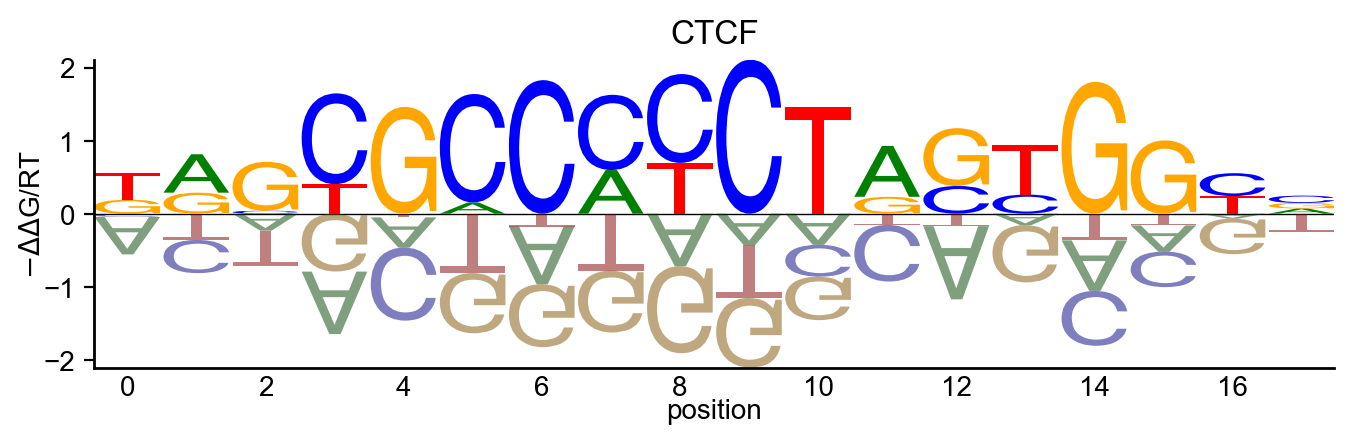

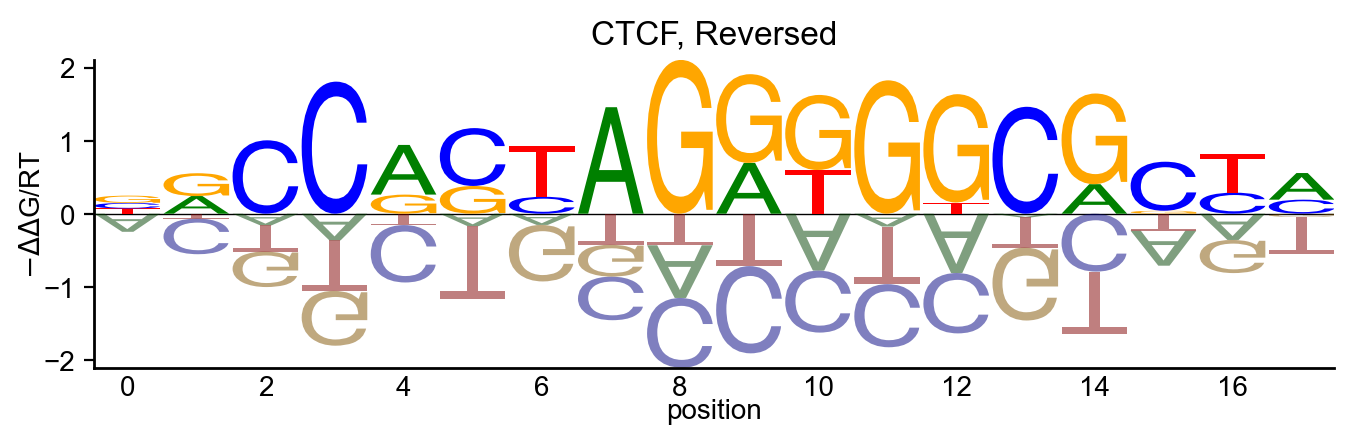

In [12]:
_ = pyprobound.plotting.logo(psam)
_ = pyprobound.plotting.logo(psam, reverse=True)

# Mode contribution

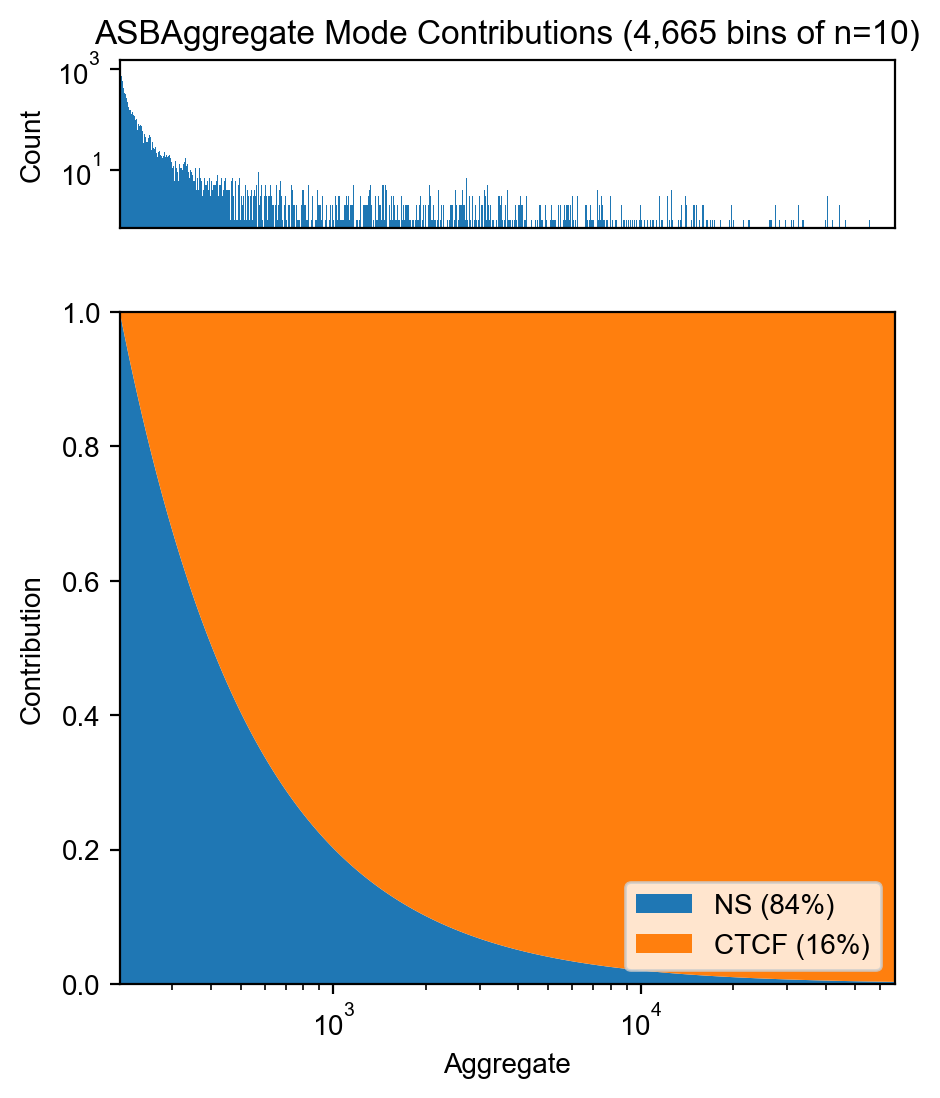

In [13]:
_ = pyprobound.plotting.contribution(aggregate, asb_table, kernel=10)